# Mediciones de cinética química

El archivo velocidades.txt contiene datos correspondientes a un estudio de hidrólisis de pnitrofenil palmitato catalizada por la actividad lipásica de células enteras de la levadura Yarrowia lipolytica. 
Se midió en él, a distintos tiempos de reacción, la absorbancia de la muestra debida al
p-nitrofenol liberado (400 nm), previo congelado de la reacción al tiempo de muestreo y centrifugación de las células que interferirían en la medida de absorbancia. 
Se hicieron 3 réplicas a cada tiempo y el resultado se expresó en velocidad actual (mmol/min/mg Pesohumedo de células).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('velocidades.txt', sep=" ")
print(datos)
datosNP = datos.to_numpy()
x = datosNP[:,0]
y = datosNP[:,1]

    Tiempo  velocidad
0        0       0.00
1        0       0.00
2        0       0.00
3        1       1.38
4        1       1.40
5        1       1.42
6        2       2.49
7        2       2.51
8        2       2.41
9        3       3.46
10       3       3.24
11       3       3.31
12       4       4.19
13       4       4.17
14       4       4.13
15       5       4.77
16       5       4.67
17       5       4.69
18       6       5.23
19       6       5.12
20       6       5.03
21       7       5.64
22       7       5.72
23       7       5.67
24       8       6.07
25       8       5.72
26       8       5.57
27       9       6.30
28       9       5.80
29       9       6.00


 
0.6482 x + 0.9533


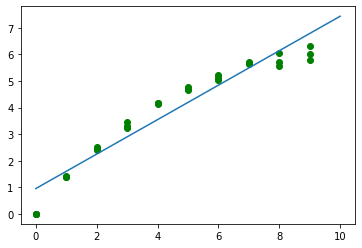

In [3]:
def minimosCuadrados(x, y):
    n = len(x)
    unos = np.ones(n)
    At = np.array([unos, x])
    A = np.transpose(At)
    AtA = np.dot(At, A)
    Aty = np.dot(At, y)
    s = np.linalg.solve(AtA, Aty)
    p = np.poly1d([s[1], s[0]])
    return(p)

lineal = minimosCuadrados(x, y)
print(lineal)

plt.scatter(x, y, c = "g")
x_plot = np.linspace(0, 10, 1000)
plt.plot(x_plot, lineal(x_plot))

[ 7.55309656 -7.44598286]


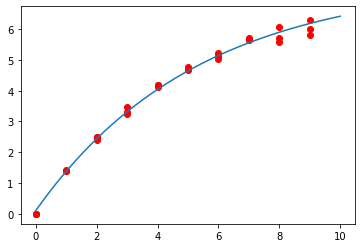

In [4]:
# Mínimos cuadrados para un modelo exponencial:
A = np.c_[np.ones(len(x)),np.e**(-0.1879*x)]
c = np.linalg.solve(A.T@A,A.T@y)

print(c)

def f(x):
    y=c[0]+c[1]*np.e**(-0.1879*x)
    return(y)
x_plt = np.linspace(0,10,1000)
plt.scatter(x,y,c="r")
plt.plot(x_plt,f(x_plt))

In [5]:
# Para decidir cual es mejor, calculo su R^2
# PARA MODELO LINEAL:
yRaya = sum(y)/len(y)
c = np.polyfit(x, y, 1)
p = np.poly1d(c)
yAsterisco = p(x)
R2 = np.linalg.norm(yAsterisco - yRaya, 2)**2 / np.linalg.norm(y - yRaya, 2)**2
print("R2 lineal = ", R2)


# PARA MODELO EXPONENCIAL:
A = np.c_[np.ones(len(x)),np.e**(-0.1879*x)]
c = np.linalg.solve(A.T@A,A.T@y)
yRaya = sum(y)/len(y)
p = c[0]+c[1]*np.e**(-0.1879*x)
R2 = np.linalg.norm(p - yRaya, 2)**2 / np.linalg.norm(y - yRaya, 2)**2
print("R2 exponencial = ", R2)

R2 lineal =  0.9264557977499788
R2 exponencial =  0.9949650499154663


Según el R cuadrado, el modelo que mejor ajusta a los datos es el modelo exponencial.